In [1]:
from bs4 import BeautifulSoup as bs
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import requests

In [2]:
from iWindsurfScraper import iWindsurfScraper

In [ ]:
np.remainder(8, 4)

In [ ]:
location = '3rd Ave Channel'

LOCATION_LOOKUP = {'3rd Ave Channel': 1374,
                   'Anita Rock-Crissy Field': 411,
                   'Palo Alto': 425,
                   'Coyote Point': 408}

USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
LANGUAGE = "en-US,en;q=0.5"

spot_id = LOCATION_LOOKUP[location]

# Pro Model Forecast
URL = 'https://api.weatherflow.com/wxengine/rest/model/getModelDataBySpot?callback=jQuery17204981289850784012_1608525296698&units_wind=mph&units_temp=f&units_distance=mi&spot_id=%i&model_id=211&wf_token=b9f5e47c00d17fce97f3391d9c5ab285&_=1608525296891' % spot_id

# Quicklook
# URL = 'https://api.weatherflow.com/wxengine/rest/model/getModelDataBySpot?callback=jQuery17204981289850784012_1608525296697&units_wind=mph&units_temp=f&units_distance=mi&spot_id=1374&model_id=-1&wf_token=b9f5e47c00d17fce97f3391d9c5ab285&_=1608525296884'

# Pro Forecast
# URL = "https://api.weatherflow.com/wxengine/rest/forecast/getOperationalForecast?callback=jQuery17206385514518878679_1608524974156&wf_token=b9f5e47c00d17fce97f3391d9c5ab285&forecast_id=2&_=1608524975003"

# Update URL
url_region = '%s' % (URL)

# Read data from URL
session = requests.Session()
session.headers['User-Agent'] = USER_AGENT
session.headers['Accept-Language'] = LANGUAGE
session.headers['Content-Language'] = LANGUAGE
html = session.get(url_region)
soup = bs(html.text, "html.parser")
soup_text = soup.text

start_idx = soup_text.index('{')
end_idx = soup_text.rfind('}') + 1
wind_dict = json.loads(soup_text[start_idx:end_idx]) 

In [ ]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

wind_time = [x['model_time_local'] for x in wind_dict['model_data']]
wind_speed = [x['wind_speed'] for x in wind_dict['model_data']]
wind_time = [datetime.datetime.strptime(x[:-5], '%Y-%m-%d %H:%M:%S') for x in wind_time]
wind_weekday = [x.weekday() for x in wind_time]
wind_weekday = [weekdays[x] for x in wind_weekday]
wind_hour = [x.hour for x in wind_time]

In [ ]:
df_temp = pd.DataFrame({'Location': location,
                       'DateTime': wind_time,
                       'Weekday': wind_weekday,
                       'Hour': wind_hour,
                       'Wind Speed [mph]': wind_speed})

if df_wind is None:
    df_wind = df_temp
else:
    df_wind = pd.concat([df_wind, df_temp], axis=1, sort=False)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(wind_time, wind_speed)
# _ = plt.xticks(rotation=45)

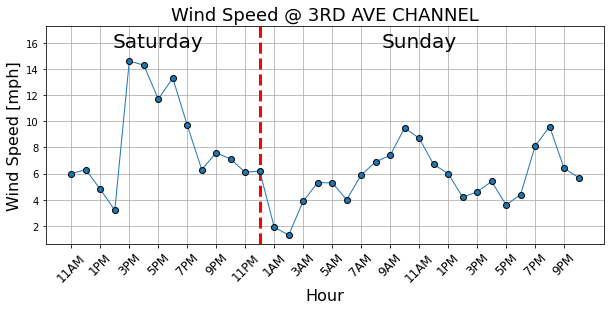

In [3]:
iw = iWindsurfScraper()
df_wind = iw.GetData('3RD AVE CHANNEL')
iw.PlotWindForecast('3RD AVE CHANNEL')

In [ ]:
df = iw.data
df[df['Hour'] == '12PM']

In [ ]:
iw.data

In [ ]:
plt.figure(figsize=(10,4))

weekdays = df_wind['Weekday'].values
_, unique_idxs = np.unique(weekdays, return_index=True)
unique_idxs = np.sort(unique_idxs)
unique_days = weekdays[unique_idxs]

# Plot lines seperating days    
df_temp = df_wind[df_wind['Hour'] == '12AM']
for x_temp in df_temp.index:
    plt.axvline(x_temp, markersize=0, linewidth=3, color='red', linestyle='--')

# Add weekday text  
max_speed = np.max(df_wind['Wind Speed [mph]'].values)
df_temp = df_wind[df_wind['Hour'] == '12PM']
for x_temp, weekday in zip(df_temp.index, df_temp['Weekday'].values):
    # Add Weekday Labels
    plt.gca().text(x=x_temp, y=max_speed - 1.5,
                   s=weekday, fontsize=20, ha='center', va='center')

x_labels = df_wind['Hour'].values
x = np.arange(0, len(x_labels), 1)
y = df_wind['Wind Speed [mph]'].values
plt.plot(x, y, markersize=6, linewidth=1, markeredgecolor='black', marker='o', color='C0')
    
# plt.axhline(16, markersize=0, linewidth=1, color='red', linestyle='--')
plt.grid(True)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Wind Speed [mph]', fontsize=16)
plt.title('Wind Speed @ %s' % location, fontsize=18)

_ = plt.xticks(ticks=x[::2], labels=x_labels[::2], rotation=45, fontsize=12)

In [ ]:
%debug

In [ ]:
if location.upper() in list(self.LOCATION_LOOKUP):
    location_key = self.LOCATION_LOOKUP[location.upper()]

df_surf = self.data[location_key]

days = 6
points_per_day = 4

weekdays = df_surf['Weekday'].values
wave_max_height = df_surf['Wave Max Height [ft]'].values
wave_avg_height = df_surf['Wave Avg Height [ft]'].values

diff = wave_max_height - wave_avg_height

x = np.arange(0, len(weekdays), 1)
x_labels = ['12AM', '6AM', '12PM', '6PM'] * days

plt.figure(figsize=(15, 7))

for i in range(days):
    x_data = x[i * points_per_day:(i + 1) * points_per_day]
    y_data = wave_avg_height[i * points_per_day:(i + 1) * points_per_day]
    diff_data = diff[i * points_per_day:(i + 1) * points_per_day]

    rects = plt.bar(x=x_data, height=y_data, width=1, yerr=diff_data,
                    edgecolor='black')

    # Draw red vertical lines
    if i != days - 1:
        plt.axvline(x_data[-1] + 0.5, color='red', markersize=0, linestyle='--',
                    linewidth=3)

    # Annotate Bars
    for rect in rects:
        height = rect.get_height()
        plt.gca().annotate('%.1f' % height,
                           xy=(rect.get_x() + rect.get_width() / 2, height + 1),
                           xytext=(0, 3),  # 3 points vertical offset
                           textcoords="offset points",
                           ha='center', va='bottom', fontsize=12)

    # Add Weekday Labels
    plt.gca().text(x=np.mean(x_data), y=np.max(wave_max_height) + 1.5,
                   s=weekdays[i * 4], fontsize=20, ha='center', va='center')

plt.gca().yaxis.grid(True)
_ = plt.xticks(ticks=x, labels=x_labels, rotation=30, fontsize=14)
_ = plt.yticks(fontsize=14)
plt.xlabel('Time [HR]', fontsize=18)
plt.ylabel('Wave Size [ft]', fontsize=18)
plt.title('Wave Size over 6 day Period at %s' % location, fontsize=28)

(min_y, max_y) = plt.ylim()
plt.ylim([min_y, max_y + 2])

In [ ]:
height